In [21]:
import matplotlib.pyplot as plt
import numpy as np
from mst_algorithm import MST
from mst_graphs_local import NetworkXGraph
import networkx as nx
import random
import time
from enum import Enum


In [22]:
global_size = 1000
global_degree = 4
global_max_weight = 100
global_max_read = 50

def print_constants(graph_type, weight_distribution):
    output = "Size: "+str(global_size)+"\n"+"Degree: "+str(global_degree)+"\n"+"Max Weight: "+str(global_max_weight)+"\n"+"Max Read: "+str(global_max_read)+"\n"+"Graph Type: "+str(graph_type)+"\n"+"Weight Distribution: "+str(weight_distribution)+"\n"
    print(output)

In [23]:
#Random NetworkX graph

def random_graph(degree,size):
    graph = nx.generators.random_regular_graph(degree, size)
    print("checkpoint random graph gen")
    print(graph)
    return graph
    
#Expanders NetworkX Graph

def expander_graph(size):
    graph = nx.generators.paley_graph(size)
    return graph


# Complete graph

def complete_graph(size):
    graph = nx.generators.complete_graph(size)
    return graph

# Cycle graph

def cycle_graph(size):
    graph = nx.generators.cycle_graph(size)
    return graph


In [24]:
def assign_random_edge_weights(graph, max_weight):
    print("checkpoint random weights")
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = random.randint(1, max_weight)
    return graph

def assign_exponential_edge_weights(graph,custom_scale=1):
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = round(np.random.exponential(scale=custom_scale))
    return graph

def assign_normal_edge_weights(graph, max_weight):
    for (u, v) in graph.edges():
        graph.edges[u, v]['weight'] = round(np.random.normal(loc=(max_weight/2)))
    return graph

In [25]:
class GraphType(Enum):
    RANDOM = 'ramdom_graph'
    EXPANDER = 'expander_graph'
    COMPLETE = 'complete_graph'
    CYCLE = 'cycle_graph'
    
class WeightDistribution(Enum):
    RANDOM = 'random_weights'
    EXPONENTIAL = 'exponantial_weights'
    NORMAL = 'normal_weights'
    

def kruskall_comparison(custom_size=global_size,graph_type=GraphType.RANDOM,weight_distribution=WeightDistribution.RANDOM):
    
    if global_max_read >= custom_size:
        raise Exception("Please reduce global_max_read or increase node size!")
    
    print("Create graph with the following constants:")
    print_constants(graph_type,weight_distribution)
    
    #Chose here different graph options from above
    graph = None
    
    if graph_type is GraphType.RANDOM:
        graph = random_graph(global_degree,custom_size)
    elif graph_type is GraphType.EXPANDER:
        graph = expander_graph(custom_size)
    elif graph_type is GraphType.COMPLETE:
        graph = complete_graph(custom_size)
    elif graph_type is GraphType.CYCLE:
        graph = complete_graph(custom_size)
            
    print("checkpoint after graph generation")        
    print(graph)        
            
    #Chose here different weight sampling options from above
    if weight_distribution is WeightDistribution.RANDOM:
        graph = assign_random_edge_weights(graph, global_max_weight)
    elif weight_distribution is WeightDistribution.EXPONENTIAL:
        graph = assign_exponential_edge_weights(graph)
    elif weight_distribution is WeightDistribution.NORMAL:
        graph = assign_normal_edge_weights(graph,global_max_weight)
        
    #Our algorithm
    our_start_time = time.time()
    approx = MST(
        NetworkXGraph(graph, custom_size, global_max_weight, global_max_read)
    ).approx_weight()
    our_runtime = time.time() - our_start_time
    print("Our Runtime: "+str(our_runtime))
    #print("Our MST weight approx. for random graph:", approx,"\n")
    
    #NetworkX Kruskall Algorithm
    kruskall_start_time = time.time()
    mst=nx.minimum_spanning_tree(graph)
    kruskall_time = time.time()-kruskall_start_time
    print("NetworkX Kruskall runtime: "+str(kruskall_time))

    gt_w = sum(graph.edges[e]["weight"] for e in mst.edges)
    print("ground truth weight", gt_w)

    ratio = max(gt_w, approx) / min(gt_w, approx)
    err = 100 * (ratio - 1)
    print("error %", err)
    
    results = {
        "our_time" : our_runtime,
        "kuskrall_time" : kruskall_time,
        "groundtruth" : gt_w,
        "approximation" : approx,
        "error" : err
    }
    
    return results

In [26]:
def increasing_runtime_performance():
    sizes = []
    o_times = []
    k_times = []
    for size in range(100,1000,100):
        print(size)
        try:
            results = kruskall_comparison(custom_size=size, graph_type=GraphType.RANDOM, weight_distribution=WeightDistribution.RANDOM)
        except Exception as e:
            print(e)
        sizes.append(size)
        o_times.append(results["our_time"])
        k_times.append(results["kuskrall_time"])
    plt.plot(sizes,o_times)
    plt.plot(sizes,k_times)
    plt.show()

100
Create graph with the following constants:
Size: 1000
Degree: 4
Max Weight: 100
Max Read: 50
Graph Type: GraphType.RANDOM
Weight Distribution: WeightDistribution.RANDOM

checkpoint random graph gen

checkpoint after graph generation

checkpoint random weights
Our Runtime: 0.03560972213745117
NetworkX Kruskall runtime: 0.0015532970428466797
ground truth weight 2803
error % 49.89304812834226
200
Create graph with the following constants:
Size: 1000
Degree: 4
Max Weight: 100
Max Read: 50
Graph Type: GraphType.RANDOM
Weight Distribution: WeightDistribution.RANDOM

checkpoint random graph gen

checkpoint after graph generation

checkpoint random weights
Our Runtime: 0.04723215103149414
NetworkX Kruskall runtime: 0.002705097198486328
ground truth weight 6210
error % 9.581320450885666
300
Create graph with the following constants:
Size: 1000
Degree: 4
Max Weight: 100
Max Read: 50
Graph Type: GraphType.RANDOM
Weight Distribution: WeightDistribution.RANDOM

checkpoint random graph gen

chec

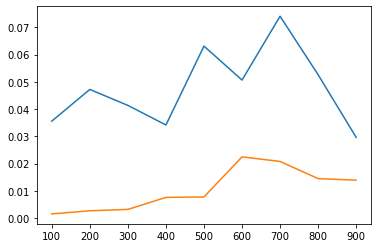

In [27]:
increasing_runtime_performance()